In [ ]:
pip install fastapi

In [ ]:
pip install "uvicorn[standard]"

In [ ]:
pip install sentence-transformers

In [ ]:
pip install requests

In [ ]:
pip install seaborn

In [7]:
import requests

In [8]:
def psp_api(data):
    endpoint = "https://app-gcrpsp-prod.azurewebsites.net/psp?enable_tokens=true"
    headers = {'Content-type': 'application/json'}
    request = requests.post(endpoint, headers=headers, json=data)
    response = request.json()
    return response

In [3]:
import pandas as pd
file_path = 'patent.csv'
data = pd.read_csv(file_path, encoding='latin1').apply(lambda x: x.astype(str))


In [20]:
# Assuming you have a dataframe named 'df' with 2532253 rows
chunk_size = 1000
total_rows = len(data)

output_dataframes = []  # List to store the output dataframes

for i in range(0, total_rows, chunk_size):
    start_idx = i
    end_idx = min(i + chunk_size, total_rows)
    chunk = data.iloc[start_idx:end_idx]
    
    # Extract the 'patent_abstract' column from the chunk
    abstracts = chunk['patent_abstract']
    
    # Create the input_data for API request
    input_data = [{"id": idx, "text": sentence} for idx, sentence in enumerate(abstracts)]
    
    # Create the API request body
    body = {"data": input_data}
    
    # Send the API request and get the response
    response = psp_api(body)
    
    # Convert the output to a DataFrame
    df_api = pd.DataFrame.from_dict(response['output'], orient='columns')
    
    # Append the df_api to the list of output dataframes
    output_dataframes.append(df_api)
    
# Concatenate all the output dataframes into a single dataframe
final_df = pd.concat(output_dataframes, ignore_index=True)

# Save the final dataframe to a CSV file
# final_df.to_csv('output.csv', index=False)

In [21]:
final_df.to_csv('output.csv', index=False)

In [1]:
import pandas as pd
final_df = pd.read_csv('output.csv')

In [3]:
final_df

,id,text,PSP,tokens
0,0,A frequency modulated (coherent) laser detecti...,0.359740,"['frequency', 'modulated', 'coherent', 'laser'..."
1,1,The invention relates to a method for producin...,0.099237,"['invention_relates', 'method_producing', 'con..."
2,2,A vacuum forming apparatus is provided that fo...,0.069818,"['vacuum', 'forming_apparatus', 'provided', 'f..."
3,3,3-D printing system include development statio...,0.130587,"['printing_system', 'include', 'development', ..."
4,4,A stretch release adhesive is disclosed. The s...,0.076954,"['stretch_release', 'adhesive', 'disclosed', '..."
...,...,...,...,...
2532248,248,Systems are provided for a âloadable moduleâ...,0.244456,"['system_provided', 'loadable', 'moduleâ', 'ar..."
2532249,249,A method can include acquiring data via a rece...,0.133181,"['method', 'include', 'acquiring', 'data', 'vi..."
2532250,250,A runtime coordination subsystem allows progra...,0.892840,"['runtime', 'coordination', 'subsystem', 'allo..."
2532251,251,Systems and methods for robotic measurement of...,0.756705,"['system', 'method', 'robotic', 'measurement',..."


In [4]:
merged_df = pd.merge(data, final_df, left_on='patent_abstract', right_on='text')

In [5]:
merged_df = merged_df.drop('text', axis=1)

In [7]:
df_ipc = pd.read_table('g_ipc_at_issue.tsv')

C:\Users\zhou.j.44\AppData\Local\Temp\ipykernel_18660\3821030277.py:1: DtypeWarning: Columns (0,2,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ipc = pd.read_table('g_ipc_at_issue.tsv')


In [8]:
selected_columns = ['patent_id','section','ipc_class','subclass']
df_ipc_section = df_ipc[selected_columns]

In [9]:
df_ipc_section = df_ipc_section.drop_duplicates()

In [10]:
df_ipc_section['ipc_section'] = df_ipc_section.apply(lambda row: ''.join([str(row['section']), str(row['ipc_class']), str(row['subclass'])]), axis=1)

In [11]:
merged_df_ipc = pd.merge(merged_df, df_ipc_section.astype({'patent_id': str}), on='patent_id')

In [12]:
merged_df_ipc['ipc_section'].value_counts().head(20)

ipc_section
G6F     658036
H4L     289354
H1L     283821
C7K     207838
A61K    187882
H4N     169996
H4W     146487
H4B     110850
A61B    106145
C12N     95005
G6K      91416
G6Q      87982
G11C     75596
C7D      69233
G11B     63367
H4M      60957
G1N      59481
G2B      55260
G6T      55136
C12P     52517
Name: count, dtype: int64

In [19]:
selected_columns = [ 'ipc_section', 'patent_id', 'patent_abstract', 'issue_date','xi_real', 'cites','tokens','section', 'ipc_class', 'subclass']
df = merged_df_ipc[selected_columns]
df

,ipc_section,patent_id,patent_abstract,issue_date,xi_real,cites,tokens,section,ipc_class,subclass
0,G1S,10000000,A frequency modulated (coherent) laser detecti...,2018-06-19,24.799967331217285,8.0,"['frequency', 'modulated', 'coherent', 'laser'...",G,1,S
1,B65B,10000003,The invention relates to a method for producin...,2018-06-19,23.18229915576005,2.0,"['invention_relates', 'method_producing', 'con...",B,65,B
2,B29C,10000003,The invention relates to a method for producin...,2018-06-19,23.18229915576005,2.0,"['invention_relates', 'method_producing', 'con...",B,29,C
3,B32B,10000003,The invention relates to a method for producin...,2018-06-19,23.18229915576005,2.0,"['invention_relates', 'method_producing', 'con...",B,32,B
4,C8J,10000003,The invention relates to a method for producin...,2018-06-19,23.18229915576005,2.0,"['invention_relates', 'method_producing', 'con...",C,8,J
...,...,...,...,...,...,...,...,...,...,...
5757157,G5B,9958854,Systems and methods for robotic measurement of...,2018-05-01,17.392656016592596,7.0,"['system', 'method', 'robotic', 'measurement',...",G,5,B
5757158,G5D,9958854,Systems and methods for robotic measurement of...,2018-05-01,17.392656016592596,7.0,"['system', 'method', 'robotic', 'measurement',...",G,5,D
5757159,B23H,9958855,"An electro discharge machining system, and man...",2018-05-01,6.797278726140671,0.0,"['electro', 'discharge', 'machining', 'system'...",B,23,H
5757160,G5B,9958855,"An electro discharge machining system, and man...",2018-05-01,6.797278726140671,0.0,"['electro', 'discharge', 'machining', 'system'...",G,5,B


In [51]:
# Function to remove 'first' and 'second' from the token lists
def remove_words(tokens):
    return [token for token in tokens if token not in ['first', 'second','include','includes','provided']]

# Apply the remove_words function to remove 'first' and 'second' from the token lists
merged_df_ipc['tokens'] = merged_df_ipc['tokens'].apply(remove_words)


In [20]:
# Convert the 'xi_real' column to numeric data type
df['xi_real'] = pd.to_numeric(df['xi_real'], errors='coerce')

# Determine the range of the 'xi_nominal' column
column_range = df['xi_real'].max() - df['xi_real'].min()

print("Range of xi_real column:", column_range)

Range of xi_real column: 2573.7803303780465


C:\Users\zhou.j.44\AppData\Local\Temp\ipykernel_18660\263533280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['xi_real'] = pd.to_numeric(df['xi_real'], errors='coerce')


In [21]:
# Convert 'issue_date' column to datetime format
df['issue_date'] = pd.to_datetime(df['issue_date'])

# Determine the time frame range
start_date = df['issue_date'].min()
end_date = df['issue_date'].max()

print("Time Frame Range: {} to {}".format(start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d')))

Time Frame Range: 1976-01-06 to 2022-12-27


C:\Users\zhou.j.44\AppData\Local\Temp\ipykernel_18660\1409266490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['issue_date'] = pd.to_datetime(df['issue_date'])


In [15]:
type(df['tokens'])

pandas.core.series.Series

C:\Users\zhou.j.44\AppData\Local\Temp\ipykernel_18660\2309717547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['xi_real'] = pd.to_numeric(df['xi_real'], errors='coerce')


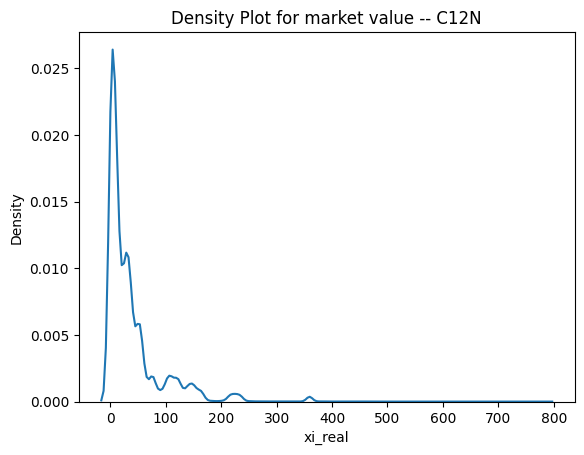

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
# Convert the 'xi_real' column to numeric data type
df['xi_real'] = pd.to_numeric(df['xi_real'], errors='coerce')
subset = df[df['ipc_section'] == 'C12N']
# Create a density plot
sns.kdeplot(data=subset, x='xi_real')

# Add labels and title
plt.xlabel('xi_real')
plt.ylabel('Density')
plt.title('Density Plot for market value -- C12N')

# Display the plot
plt.show()

In [ ]:
frequent_table_str = frequent_table.to_string(index=False)

In [28]:
# Filter the dataframe based on conditions
filtered_df = df[(df['ipc_section'] == 'C12N')].nlargest(10, 'xi_real')
filtered_df['tokens'] = filtered_df['tokens'].apply(eval)

# Combine the tokens from the filtered dataframe into a single list
token_list = [token for sublist in filtered_df['tokens'] for token in sublist]

# Calculate word frequencies
word_frequencies = Counter(token_list)

# Get the top 10 frequent words
top_20_words = word_frequencies.most_common(20)

# Create a dataframe from the top 10 frequent words
top_20_df = pd.DataFrame(top_20_words, columns=['Word', 'Frequency'])

print(top_20_df)

                 Word  Frequency
0               toxin         18
1           difficile         15
2              mutant         12
3              vector         12
4         clostridium          9
5           least_one          9
6              method          9
7         composition          8
8                acid          7
9   invention_relates          6
10        may_include          6
11             domain          6
12           mutation          6
13           encoding          6
14        immunogenic          5
15  present_invention          5
16              plant          5
17          construct          5
18         comprising          5
19           includes          4


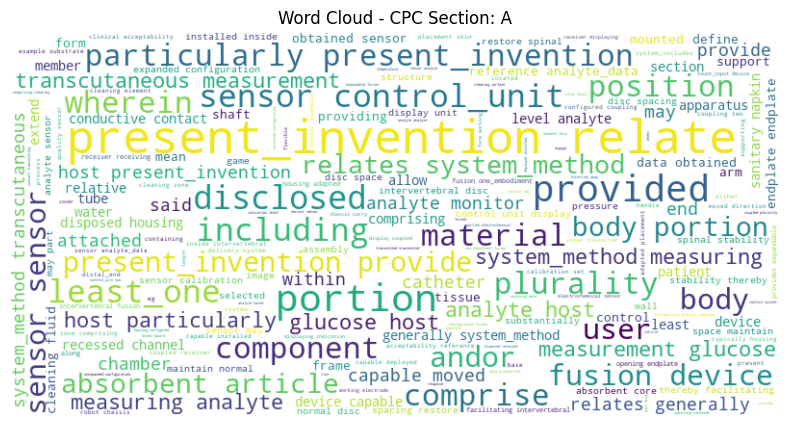

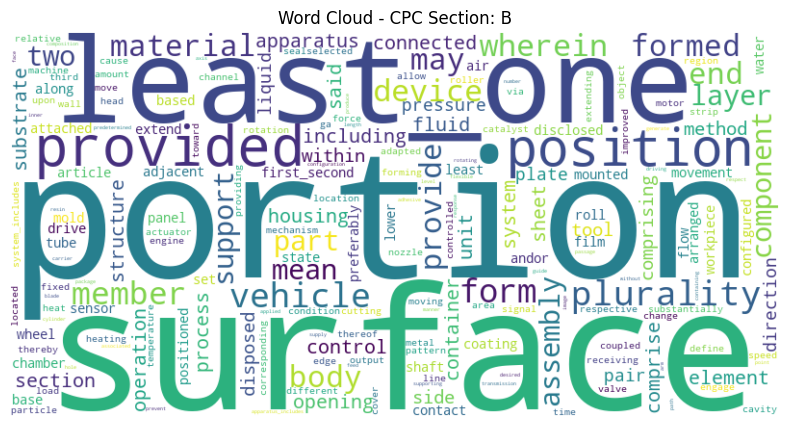

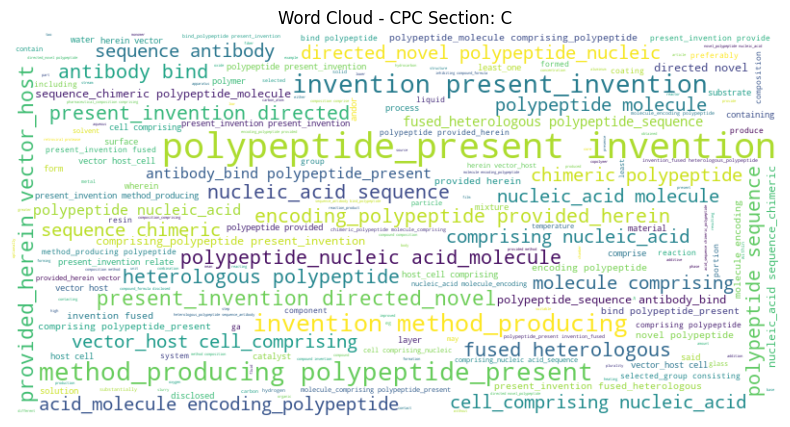

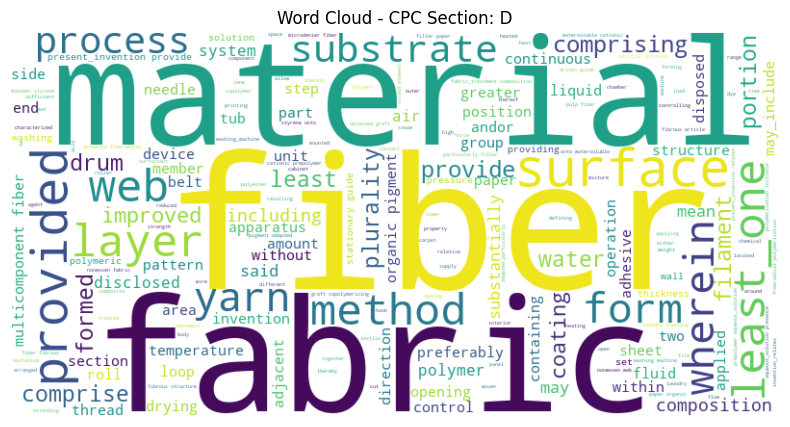

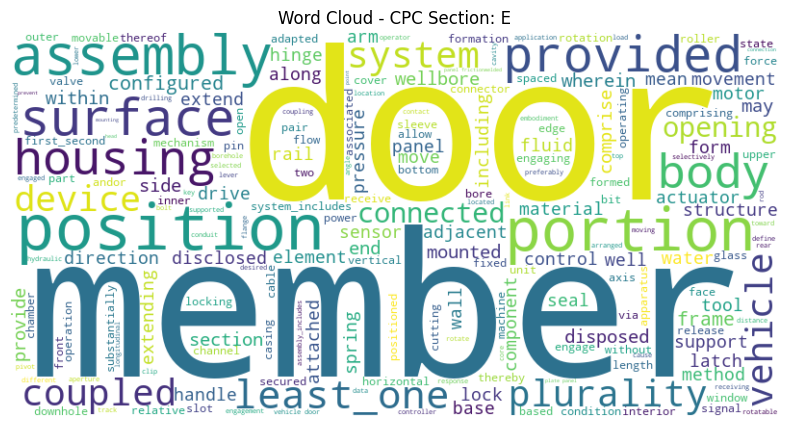

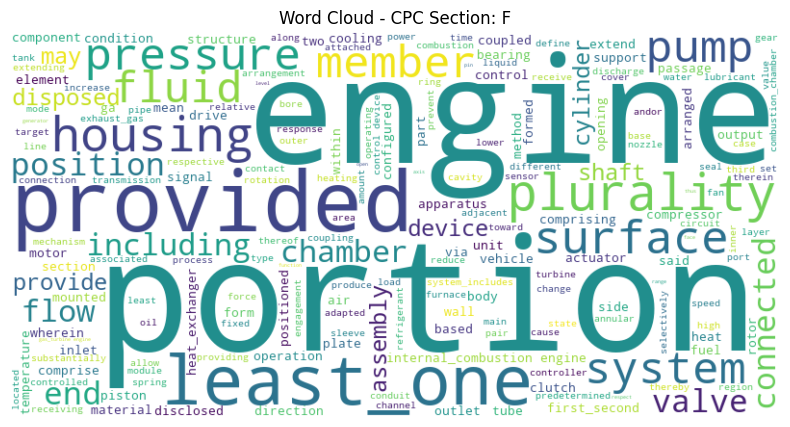

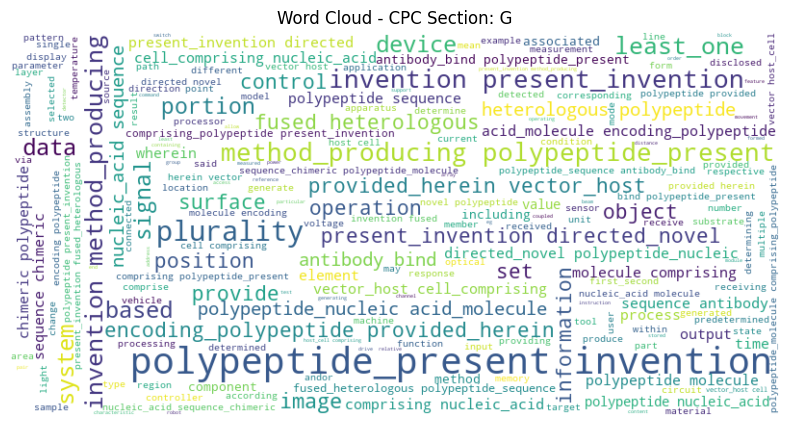

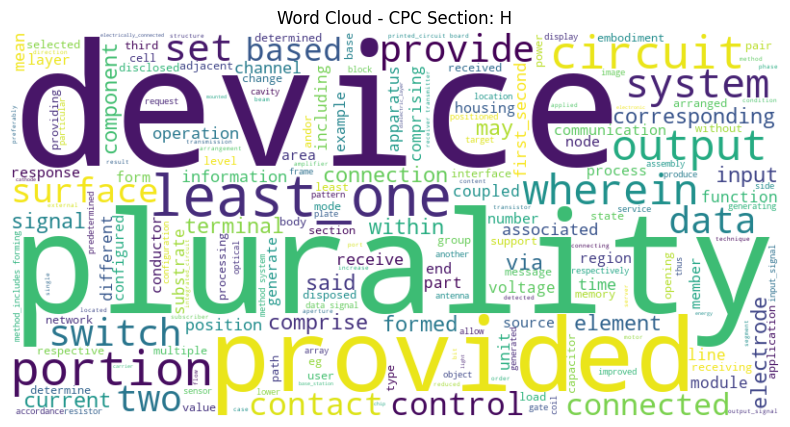

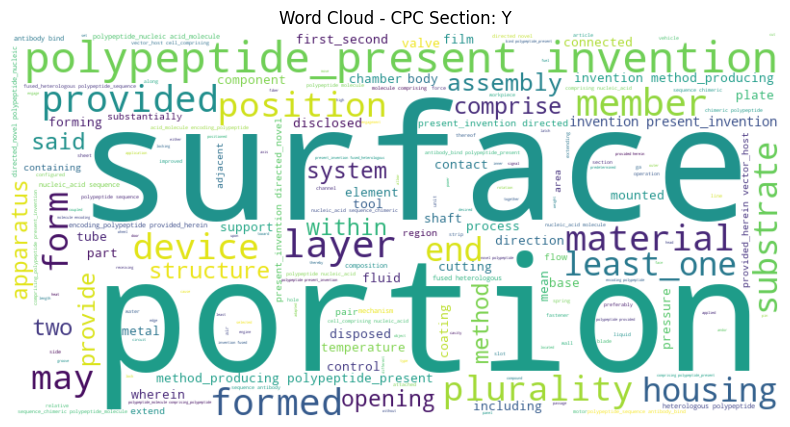

In [60]:
# Function to remove 'first' and 'second' from the token lists
# def remove_words(tokens):
#     return [token for token in tokens if token not in ['first', 'second','include','includes']]

# Apply the remove_words function to remove 'first' and 'second' from the token lists
# merged_df_cpc['tokens'] = merged_df_cpc['tokens'].apply(remove_words)

# Group the dataframe by 'cpc_section' and concatenate all tokens into a single string
grouped_df = merged_df_cpc.groupby('cpc_section')['tokens'].apply(lambda x: ' '.join([token for sublist in x for token in sublist]))

# Iterate over each 'cpc_section' and create a word cloud
for cpc_section, tokens in grouped_df.items():
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tokens)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - CPC Section: {cpc_section}')
    plt.show()